配置

In [85]:
sample_rate = 44100
buffer_size = 256

plugin_paths = {
    'Sylenth1': 'C:/VstPlugins/64bit/Sylenth1.dll',
    'TruePianos': 'C:/VstPlugins/64bit/Vstplugins/TruePianos x64.dll',
}

preset_dirs = {
    'Sylenth1': 'presets/sylenth1',
}

# preset_gen_model_one_filename = 'models/preset_gen/model_one.h5'
res_dir = 'C:/dev_spa/artear_1/res'

wav_gen_dir = 'C:/dev_spa/artear_1/wav_gen'


c:\anaconda3\envs\dawdmr\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


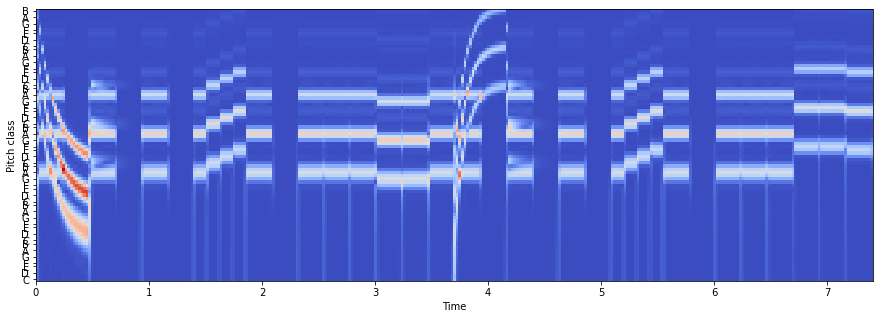

(84, 319)
[[ 8.1657790e-02+6.7643392e-05j  1.4715008e-03-1.4591590e-02j
  -2.5236036e-03-7.2481716e-04j ... -3.1310183e-06-2.2761258e-06j
   9.4627840e-06+6.3312698e-05j  3.3327108e-04+4.2388299e-05j]
 [ 8.1086531e-02-2.1067393e-05j  4.7874269e-03-1.3446939e-02j
  -2.0799732e-03-6.0568581e-04j ... -3.0555095e-06-1.9493182e-06j
   2.5730986e-05+5.6914068e-05j  3.3509877e-04+3.2987249e-05j]
 [ 8.8587716e-02-1.6378212e-05j  5.1594246e-03-7.9499548e-03j
  -1.6552365e-03-2.0308493e-04j ... -2.7555050e-06-1.6705588e-06j
   2.9282244e-05+3.2011128e-05j  3.7561756e-04+3.5213947e-05j]
 ...
 [ 1.7379773e-01+2.6197680e-03j -6.3597993e-03+2.0102016e-03j
  -9.6205139e-04+1.1409809e-04j ...  3.7412469e-03+4.9905023e-03j
  -3.1221798e-03-3.9364472e-03j -3.8205611e-04+4.5821667e-03j]
 [ 1.1199674e-01-4.5160991e-03j -8.4353138e-05+1.3603768e-03j
  -1.0749834e-03-1.4182162e-03j ... -6.8293500e-04-1.3437821e-02j
  -1.4052867e-02-6.8616150e-03j -1.4514279e-02+6.3884021e-03j]
 [-1.3016492e-01-5.0450806e-03

In [86]:
from librosa import display as rosadisplay
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

data, sr = librosa.load('test8.wav')
hop_length = 512
chromagram = librosa.vqt(data, hop_length=hop_length)
plt.figure(figsize=(15, 5))
rosadisplay.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

plt.show()
print(chromagram.shape)
print(chromagram)

In [87]:
def get_files(directory, ext):
    import os
    path_list = []
    for paths in [[os.path.join(dirpath, name).replace('\\', '/') for name in filenames if name.endswith('.' + ext)] for dirpath, dirnames, filenames in os.walk(directory)]:
        path_list.extend(paths)
    return path_list

mid_paths = get_files(res_dir, 'mid')
fxp_paths = get_files(res_dir, 'fxp')

print(mid_paths, end='\n\n')
print(fxp_paths, end='\n\n')

['C:/dev_spa/artear_1/res/1.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20200817_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20200818_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20200818_02.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20200819_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20200819_02.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20200820_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201019_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201101_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201114_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201115_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201115_02.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201116_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201207_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201208_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201208_02.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201209_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/chord/20201211_01.mid', 'C:/dev_spa/artear_1/res/MIDI库/

In [88]:
import os
import random
import dawdreamer as daw
from scipy.io import wavfile

engine = daw.RenderEngine(sample_rate, buffer_size)

instr = engine.make_plugin_processor('instr_1', plugin_paths['Sylenth1'])
engine.load_graph([(instr, [])])

for mid in mid_paths:
    fxp = random.choice(fxp_paths)
    instr.load_midi(mid)
    instr.load_preset(fxp)
    print('Rendering:', mid, fxp)
    engine.render(10.)
    audio = engine.get_audio()
    audio_path = os.path.join(wav_gen_dir, os.path.splitext(os.path.basename(mid))[0] + '.wav')
    print('Writing:', audio_path)
    wavfile.write(audio_path, sample_rate, audio.transpose())

Rendering: C:/dev_spa/artear_1/res/1.mid C:/dev_spa/artear_1/res/presets/sylenth1/pluck_20210629/PLUCK - 05.fxp
Writing: C:/dev_spa/artear_1/wav_gen\1.wav
Rendering: C:/dev_spa/artear_1/res/MIDI库/chord/20200817_01.mid C:/dev_spa/artear_1/res/presets/sylenth1/pluck_20210629/PLUCK - 06.fxp
Writing: C:/dev_spa/artear_1/wav_gen\20200817_01.wav
Rendering: C:/dev_spa/artear_1/res/MIDI库/chord/20200818_01.mid C:/dev_spa/artear_1/res/presets/sylenth1/pluck_20210629/LEAD - Euphoric Pluck.fxp
Writing: C:/dev_spa/artear_1/wav_gen\20200818_01.wav
Rendering: C:/dev_spa/artear_1/res/MIDI库/chord/20200818_02.mid C:/dev_spa/artear_1/res/presets/sylenth1/pluck_20210629/R3hab Pluck 8.fxp
Writing: C:/dev_spa/artear_1/wav_gen\20200818_02.wav
Rendering: C:/dev_spa/artear_1/res/MIDI库/chord/20200819_01.mid C:/dev_spa/artear_1/res/presets/sylenth1/pluck_20210629/MitiS Super Trance Pluck.fxp
Writing: C:/dev_spa/artear_1/wav_gen\20200819_01.wav
Rendering: C:/dev_spa/artear_1/res/MIDI库/chord/20200819_02.mid C:/dev

In [89]:
print(plugin_paths['TruePianos'])

C:/VstPlugins/64bit/Vstplugins/TruePianos x64.dll


In [90]:
from musicpy import read
import librosa
import numpy as np

list_input_n, list_output_n = [], []

wav_paths = get_files(wav_gen_dir, 'wav')
for wav_file in wav_paths:
    # print(wav_file)
    wav_data, sr = librosa.load(wav_file)
    data = librosa.vqt(wav_data, sr=sr, hop_length=512)
    # print(data.shape)
    list_input_n.append(data)

for mid_file in mid_paths:
    bpm, a = read(mid_file)[:2]
    lst_ = [[bpm] + [i.degree / 128. for i in a],
            [i.duration / 2. if i.duration <= 2 else 1. for i in a],
            [interval / 2. if interval <= 2 else 1. for interval in a.interval]]
    for i in range(len(lst_)):
        lst_[i] = np.pad(np.array(lst_[i]), (0, 256 - len(lst_[i])), 'constant', constant_values=(0, 0))
    lst = np.concatenate(lst_)
    list_output_n.append(lst)

input_n = np.array(list_input_n, dtype='float32')
output_n = np.array(list_output_n, dtype='float32')
print(input_n.shape, output_n.shape, sep='\n')

(34, 84, 431)
(34, 768)


C:\Users\Dajun\AppData\Local\Temp/ipykernel_33784/1285035032.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  input_n = np.array(list_input_n, dtype='float32')


In [91]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

def build_model():
    x = Input(shape=(84, 431, ), dtype='float32', name='input')
    h = Flatten()(x)
    h = Dense(1024, activation='relu')(h)
    y = Dense(768, activation='relu', name='output')(h)
    modl = Model(inputs=x, outputs=y)
    modl.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return modl

test_train_ratio = 0.9
n_train = int(input_n.shape[0] * test_train_ratio)
print(n_train, input_n.shape[0] - n_train)
input_train, input_test = input_n[:n_train], input_n[n_train:]
output_train, output_test = output_n[:n_train], output_n[n_train:]

print()
print(input_train.shape, input_test.shape)
print(output_train.shape, output_test.shape)

model = build_model()

# model.fit(x=input_train, y=output_train, validation_data=(input_test, output_test), epochs=10, batch_size=4)

30 4

(30, 84, 431) (4, 84, 431)
(30, 768) (4, 768)


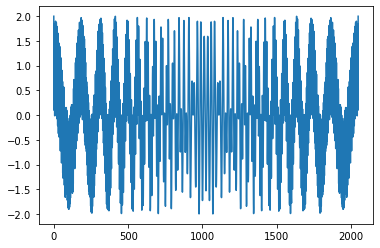

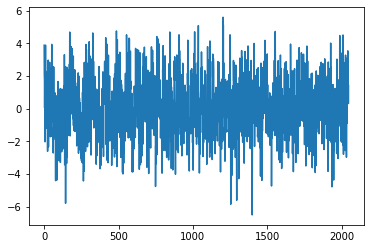

c:\anaconda3\envs\dawdmr\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9103. The TBB threading layer is disabled.
  warnings.warn(problem)


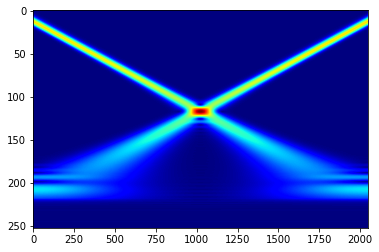

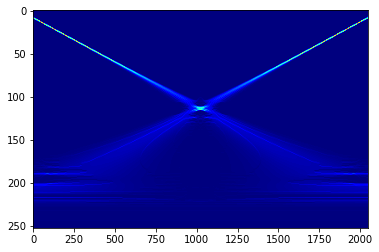

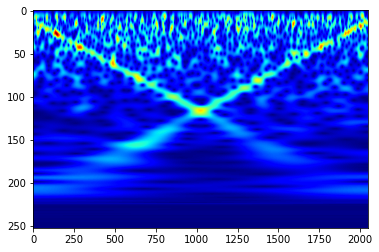

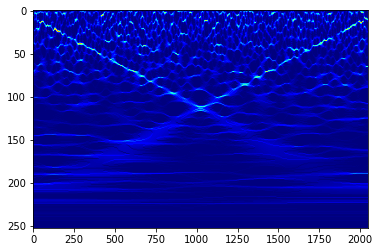

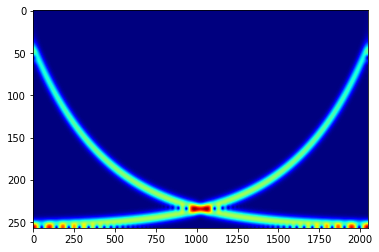

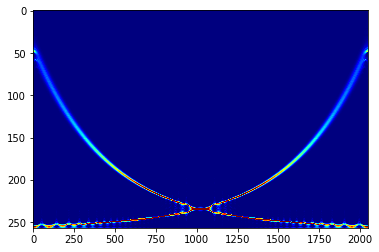

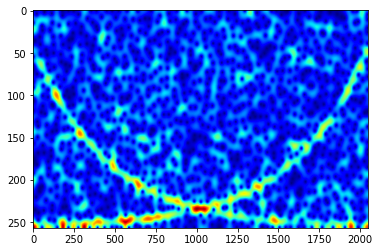

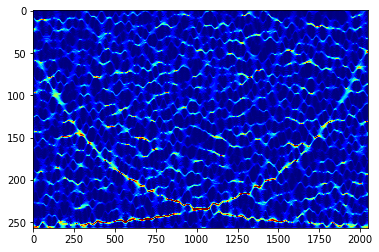

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ssqueezepy import ssq_cwt, ssq_stft


def viz(x, Tx, Wx):
    plt.imshow(np.abs(Wx), aspect='auto', cmap='jet')
    plt.show()
    plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap='jet')
    plt.show()


N = 2048
t = np.linspace(0, 10, N, endpoint=False)
xo = np.cos(2 * np.pi * 2 * (np.exp(t / 2.2) - 1))
xo += xo[::-1]  # add self reflected
x = xo + np.sqrt(2) * np.random.randn(N)  # add noise

plt.plot(xo);
plt.show()
plt.plot(x);
plt.show()

Twxo, Wxo, *_ = ssq_cwt(xo)
viz(xo, Twxo, Wxo)

Twx, Wx, *_ = ssq_cwt(x)
viz(x, Twx, Wx)

Tsxo, Sxo, *_ = ssq_stft(xo)
viz(xo, np.flipud(Tsxo), np.flipud(Sxo))

Tsx, Sx, *_ = ssq_stft(x)
viz(x, np.flipud(Tsx), np.flipud(Sx))